## Bender configuration

In [1]:
# Imports
from gfeatpy import plotting
from gfeatpy.observation import Range, Constellation, LongitudePolicy
from gfeatpy.gravity import EquivalentWaterHeight, GravityField, SphericalHarmonicsCovariance
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.dpi"] = 150

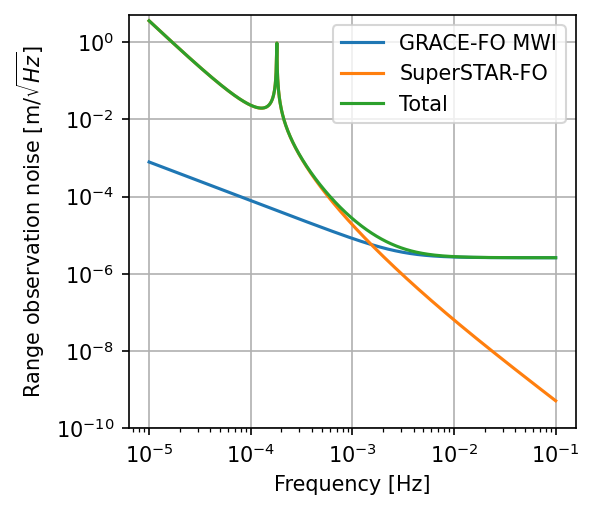

In [3]:
# Define error spectra
mwi = lambda f: 2.62 * np.sqrt(1 + (0.003/f)**2) * 1e-6
acc = lambda f: 1e-10 * np.sqrt(1 + (f/0.5)**4 + (0.005/f))

# Plot spectra
plt.figure(figsize=(4,3.5))
f = np.logspace(-5, -1, 1000)
n = np.sqrt(3.986e14 / (6771e3)**3)
w = f * (2*np.pi)
mwi_asd = mwi(f)
acc_asd = 2 * (np.abs(2*n / (w * (n**2 - w**2))) + np.abs((3*n**2 + w**2) / (w**2 * (n**2 - w**2)))) * acc(f)
plt.loglog(f, mwi_asd, label="GRACE-FO MWI")
plt.loglog(f, acc_asd, label="SuperSTAR-FO")
plt.loglog(f, mwi_asd + acc_asd, label="Total")
plt.ylabel('Range observation noise [m/$\\sqrt{{Hz}}$]')
plt.xlabel('Frequency [Hz]')
plt.legend()
plt.grid()
plt.tight_layout()
plt.ylim([1e-10, 5])
plt.show()

In [13]:
# Define observation settings
l_max = 60
Nr = 31
Nd = 2
I = np.deg2rad([89, 55])
rho= 220e3
# Set up system and solve
bender = Constellation(l_max, Nr, Nd, I, rho, LongitudePolicy.OVERLAPPING)
bender.set_observation_error(mwi, acc)
bender.set_kaula_regularization()
bender.solve()

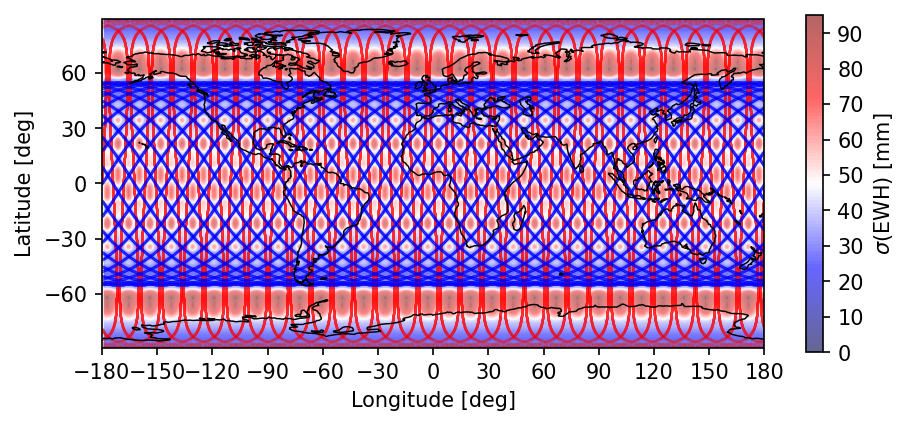

In [17]:
plotting.synthesis(bender, n_lon=360, n_lat=180, functional=EquivalentWaterHeight(0))
plotting.ground_track(Nr, Nd, I[0], color='r', s=0.005)
plotting.ground_track(Nr, Nd, I[1], we_0=np.pi, color='b', s=0.005)

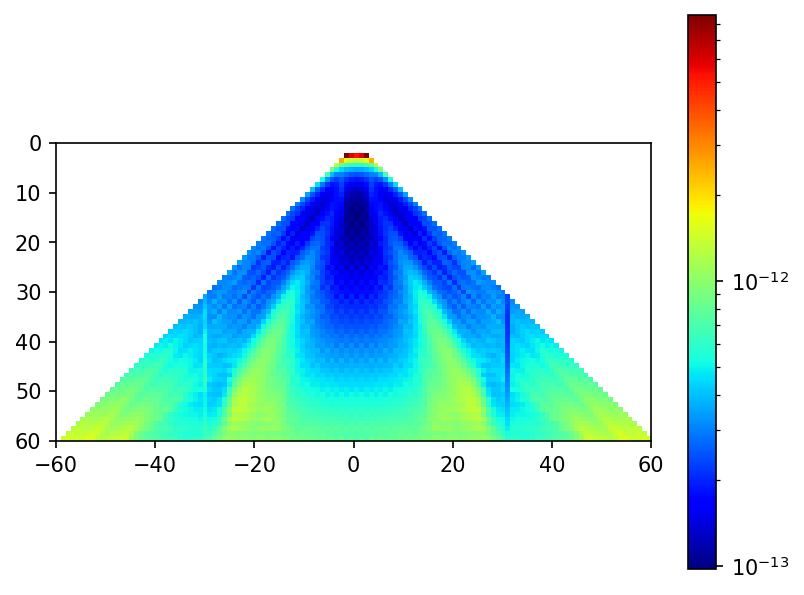

In [18]:
plotting.pyramid(bender)
plt.show()